# Project Check-In
Xavier Hummer, Jacob Kronlage, Ryan Perry    

---

In [1]:
# Import packages

import pandas as pd
import numpy as np

In [2]:
# Open initial Kaggle dataset into dataframe

initial_df = pd.read_csv('baseball.csv', encoding = 'utf-8')

# Confirm creation

initial_df

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,PHI,NL,1962,705,759,81,0.330,0.390,0.260,0,NaN,NaN,161,NaN,NaN
1228,PIT,NL,1962,706,626,93,0.321,0.394,0.268,0,NaN,NaN,161,NaN,NaN
1229,SFG,NL,1962,878,690,103,0.341,0.441,0.278,1,1.0,2.0,165,NaN,NaN
1230,STL,NL,1962,774,664,84,0.335,0.394,0.271,0,NaN,NaN,163,NaN,NaN


In [3]:
# Identify all team abbreviations used in the dataset to help with mapping

initial_df['Team'].unique()

array(['ARI', 'ATL', 'BAL', 'BOS', 'CHC', 'CHW', 'CIN', 'CLE', 'COL',
       'DET', 'HOU', 'KCR', 'LAA', 'LAD', 'MIA', 'MIL', 'MIN', 'NYM',
       'NYY', 'OAK', 'PHI', 'PIT', 'SDP', 'SEA', 'SFG', 'STL', 'TBR',
       'TEX', 'TOR', 'WSN', 'FLA', 'TBD', 'ANA', 'MON', 'CAL', 'WSA',
       'SEP', 'KCA', 'MLN'], dtype=object)

In [4]:
# Identify current and historical team codes to create a new team name column

team_name_map = {
    'ARI': 'Arizona Diamondbacks',
    'ATL': 'Atlanta Braves',
    'BAL': 'Baltimore Orioles',
    'BOS': 'Boston Red Sox',
    'CHC': 'Chicago Cubs',
    'CIN': 'Cincinnati Reds',
    'CLE': 'Cleveland Indians',
    'COL': 'Colorado Rockies',
    'CHW': 'Chicago White Sox',
    'DET': 'Detroit Tigers',
    'FLA': 'Florida Marlins',
    'HOU': 'Houston Astros',
    'KCR': 'Kansas City Royals',
    'LAA': 'Los Angeles Angels',
    'LAD': 'Los Angeles Dodgers',
    'MIA': 'Miami Marlins',
    'MIL': 'Milwaukee Brewers',
    'MIN': 'Minnesota Twins',
    'MON': 'Montreal Expos',
    'NYM': 'New York Mets',
    'NYY': 'New York Yankees',
    'OAK': 'Oakland Athletics',
    'PHI': 'Philadelphia Phillies',
    'PIT': 'Pittsburgh Pirates',
    'SDP': 'San Diego Padres',
    'SEA': 'Seattle Mariners',
    'SFG': 'San Francisco Giants',
    'STL': 'St. Louis Cardinals',
    'TBR': 'Tampa Bay Rays',
    'TEX': 'Texas Rangers',
    'TOR': 'Toronto Blue Jays',
    'WSN': 'Washington Nationals',
    'FLA': 'Florida Marlins',        
    'TBD': 'Tampa Bay Devil Rays',   
    'ANA': 'Anaheim Angels',         
    'MON': 'Montreal Expos',         
    'CAL': 'California Angels',      
    'WSA': 'Washington Senators',    
    'SEP': 'Seattle Pilots',         
    'KCA': 'Kansas City Athletics',  
    'MLN': 'Milwaukee Braves'      
}

In [5]:
# Create the new column using the 'Team' column and mapping list

initial_df['Team Name'] = initial_df['Team'].map(team_name_map)
initial_df.head(5)

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,Team Name
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415,Arizona Diamondbacks
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378,Atlanta Braves
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403,Baltimore Orioles
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428,Boston Red Sox
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424,Chicago Cubs


In [6]:
# Drop columns that are not useful for our research questions

initial_df.drop(['RankSeason','OOBP', 'OSLG'], axis = 1, inplace = True)
initial_df.head(5)

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankPlayoffs,G,Team Name
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,162,Arizona Diamondbacks
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,5.0,162,Atlanta Braves
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,4.0,162,Baltimore Orioles
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,162,Boston Red Sox
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,162,Chicago Cubs


In [7]:
# Change binary logic 0 and 1 values to 'No' and 'Yes' for whether teams made the playoffs

initial_df['Playoffs'] = initial_df['Playoffs'].astype('object') # Change data type
initial_df['Playoffs'] = initial_df['Playoffs'].map({1: 'Yes', 0: 'No'}).astype('object')
initial_df.head(5)

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankPlayoffs,G,Team Name
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,No,NaN,162,Arizona Diamondbacks
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,Yes,5.0,162,Atlanta Braves
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,Yes,4.0,162,Baltimore Orioles
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,No,NaN,162,Boston Red Sox
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,No,NaN,162,Chicago Cubs


In [8]:
# Rename columns to make the data easier to digest

initial_df = initial_df.rename(columns = {
    'RankPlayoffs': 'PlayoffsFinish',
    'W': 'Wins',
    'G': 'Games'
    
})

In [9]:
# Replace NaN values for column with blanks

initial_df['PlayoffsFinish'] = initial_df['PlayoffsFinish'].replace(np.nan, "")
initial_df

,Team,League,Year,RS,RA,Wins,OBP,SLG,BA,Playoffs,PlayoffsFinish,Games,Team Name
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,No,,162,Arizona Diamondbacks
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,Yes,5.0,162,Atlanta Braves
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,Yes,4.0,162,Baltimore Orioles
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,No,,162,Boston Red Sox
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,No,,162,Chicago Cubs
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,PHI,NL,1962,705,759,81,0.330,0.390,0.260,No,,161,Philadelphia Phillies
1228,PIT,NL,1962,706,626,93,0.321,0.394,0.268,No,,161,Pittsburgh Pirates
1229,SFG,NL,1962,878,690,103,0.341,0.441,0.278,Yes,2.0,165,San Francisco Giants
1230,STL,NL,1962,774,664,84,0.335,0.394,0.271,No,,163,St. Louis Cardinals


In [10]:
# Confirm there are now no missing data in the dataframe

initial_df.isna().sum()

Team              0
League            0
Year              0
RS                0
RA                0
Wins              0
OBP               0
SLG               0
BA                0
Playoffs          0
PlayoffsFinish    0
Games             0
Team Name         0
dtype: int64

In [11]:
# Evaluate how the data is stored in each column

initial_df.dtypes

Team               object
League             object
Year                int64
RS                  int64
RA                  int64
Wins                int64
OBP               float64
SLG               float64
BA                float64
Playoffs           object
PlayoffsFinish     object
Games               int64
Team Name          object
dtype: object

In [59]:
# Initialize packages
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
import time
import pandas as pd

# Set up Chrome
options = Options()
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

# Create lists to later append
tm = []
hr = []
yr = []

# Loop through years 1962-2012
for year in range(1962, 2013):
    
    # Load the page
    url = f"https://www.baseball-reference.com/leagues/majors/{year}.shtml"
    driver.get(url)
    time.sleep(3)

    # Find the table
    table = driver.find_element(By.ID, "teams_standard_batting")
    rows = table.find_elements(By.TAG_NAME, "tr")

    # Create a loop and append to lists
    for row in rows[1:]:
        records = row.find_elements(By.TAG_NAME, "td")
        
        if len(records) > 0:
            team_name = row.find_element(By.TAG_NAME, "th").text
            home_runs = records[10].text
            if team_name != "" and "League Average" not in team_name:
                tm.append(team_name)
                hr.append(home_runs)
                yr.append(year)

# Load scrapped data into a Pandas dataframe
homerun_df = pd.DataFrame({
    'Team Name': tm,
    'Home Runs': hr,
    'Year': yr
})

# Convert 'Home Runs' column type to numeric
homerun_df['Home Runs'] = pd.to_numeric(homerun_df['Home Runs'], errors='coerce')

# Display dataframe
homerun_df

,Team Name,Home Runs,Year
0,Baltimore Orioles,156,1962
1,Boston Red Sox,146,1962
2,Chicago Cubs,126,1962
3,Chicago White Sox,92,1962
4,Cincinnati Reds,167,1962
...,...,...,...
1333,St. Louis Cardinals,159,2012
1334,Tampa Bay Rays,175,2012
1335,Texas Rangers,200,2012
1336,Toronto Blue Jays,198,2012


In [61]:
# Remove years that are not included in our analysis
homerun_df = homerun_df[
    (homerun_df['Year'] != 1972) &
    (homerun_df['Year'] != 1981) &
    (homerun_df['Year'] != 1994) &
    (homerun_df['Year'] != 1995)
    
]

In [72]:
# Rename the team to match the initial data

homerun_df['Team Name'] = homerun_df['Team Name'].replace({
    'Los Angeles Angels of Anaheim': 'Los Angeles Angels'
})

homerun_df['Team Name'] = homerun_df['Team Name'].replace('Houston Colt .45s', 'Houston Astros')

/var/folders/8v/j4myjvjj3yxf252l5ln82f540000gn/T/ipykernel_1179/2856449575.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homerun_df['Team Name'] = homerun_df['Team Name'].replace({
/var/folders/8v/j4myjvjj3yxf252l5ln82f540000gn/T/ipykernel_1179/2856449575.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homerun_df['Team Name'] = homerun_df['Team Name'].replace('Houston Colt .45s', 'Houston Astros')


In [73]:
homerun_df.shape

(1232, 3)

In [74]:
# Merge the scrapped data onto the initial dataframe from Kaggle

final_initial = pd.merge(initial_df, homerun_df, on = ['Team Name','Year'], how = 'left')
final_initial

,Team,League,Year,RS,RA,Wins,OBP,SLG,BA,Playoffs,PlayoffsFinish,Games,Team Name,Home Runs
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,No,,162,Arizona Diamondbacks,165
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,Yes,5.0,162,Atlanta Braves,149
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,Yes,4.0,162,Baltimore Orioles,214
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,No,,162,Boston Red Sox,165
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,No,,162,Chicago Cubs,137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,PHI,NL,1962,705,759,81,0.330,0.390,0.260,No,,161,Philadelphia Phillies,142
1228,PIT,NL,1962,706,626,93,0.321,0.394,0.268,No,,161,Pittsburgh Pirates,108
1229,SFG,NL,1962,878,690,103,0.341,0.441,0.278,Yes,2.0,165,San Francisco Giants,204
1230,STL,NL,1962,774,664,84,0.335,0.394,0.271,No,,163,St. Louis Cardinals,137


In [75]:
# Displaying the one page of additional data that was scrapped

final_initial[final_initial['Year'] == 2012]

,Team,League,Year,RS,RA,Wins,OBP,SLG,BA,Playoffs,PlayoffsFinish,Games,Team Name,Home Runs
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,No,,162,Arizona Diamondbacks,165
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,Yes,5.0,162,Atlanta Braves,149
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,Yes,4.0,162,Baltimore Orioles,214
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,No,,162,Boston Red Sox,165
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,No,,162,Chicago Cubs,137
5,CHW,AL,2012,748,676,85,0.318,0.422,0.255,No,,162,Chicago White Sox,211
6,CIN,NL,2012,669,588,97,0.315,0.411,0.251,Yes,4.0,162,Cincinnati Reds,172
7,CLE,AL,2012,667,845,68,0.324,0.381,0.251,No,,162,Cleveland Indians,136
8,COL,NL,2012,758,890,64,0.330,0.436,0.274,No,,162,Colorado Rockies,166
9,DET,AL,2012,726,670,88,0.335,0.422,0.268,Yes,2.0,162,Detroit Tigers,163


In [76]:
# Rename the columns for better readability

final_initial = final_initial[['Team', 'Team Name', 'League', 'Year',
                               'Games', 'Wins', 'Home Runs', 'RS', 'RA', 'OBP', 'SLG',
                               'BA', 'Playoffs', 'PlayoffsFinish' ]]
final_initial

,Team,Team Name,League,Year,Games,Wins,Home Runs,RS,RA,OBP,SLG,BA,Playoffs,PlayoffsFinish
0,ARI,Arizona Diamondbacks,NL,2012,162,81,165,734,688,0.328,0.418,0.259,No,
1,ATL,Atlanta Braves,NL,2012,162,94,149,700,600,0.320,0.389,0.247,Yes,5.0
2,BAL,Baltimore Orioles,AL,2012,162,93,214,712,705,0.311,0.417,0.247,Yes,4.0
3,BOS,Boston Red Sox,AL,2012,162,69,165,734,806,0.315,0.415,0.260,No,
4,CHC,Chicago Cubs,NL,2012,162,61,137,613,759,0.302,0.378,0.240,No,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,PHI,Philadelphia Phillies,NL,1962,161,81,142,705,759,0.330,0.390,0.260,No,
1228,PIT,Pittsburgh Pirates,NL,1962,161,93,108,706,626,0.321,0.394,0.268,No,
1229,SFG,San Francisco Giants,NL,1962,165,103,204,878,690,0.341,0.441,0.278,Yes,2.0
1230,STL,St. Louis Cardinals,NL,1962,163,84,137,774,664,0.335,0.394,0.271,No,


In [17]:
# Save the transformed datasets within the merged dataframe into a .csv file

final_initial.to_csv('project_proposal_dataset.csv', header = True, index = False, encoding = 'utf-8')

In [18]:
# Initialize packages to support web scraping
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
import time
options.add_argument("--headless=new")

# Set up Chrome
options = Options()
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

# Create lists to collect data
team_list = []
year_list = []
attendance_list = []

# Loop through each year from 1962 to 2012
for year in range(1962, 2013):
    print("Scraping:", year)
    url = f"https://www.thebaseballcube.com/content/mlb_att_year/{year}"
    driver.get(url)
    time.sleep(3)  # Wait for the page to load
    
    # Find the table and rows
    table = driver.find_element(By.TAG_NAME, "table")
    rows = table.find_elements(By.TAG_NAME, "tr")
    
    # Loop through the rows, skip the header
    for row in rows[1:]:
        cells = row.find_elements(By.TAG_NAME, "td")

        if len(cells) >= 5: # Check cells have values
            team = cells[0].text
            att = cells[2].text.replace(',', '')  

            if team != "" and "League Total" not in team and att.isdigit(): # Check team record is not blank and also not League Total
                team_list.append(team)
                year_list.append(year)
                attendance_list.append(int(att))

Scraping: 1962
Scraping: 1963
Scraping: 1964
Scraping: 1965
Scraping: 1966
Scraping: 1967
Scraping: 1968
Scraping: 1969
Scraping: 1970
Scraping: 1971
Scraping: 1972
Scraping: 1973
Scraping: 1974
Scraping: 1975
Scraping: 1976
Scraping: 1977
Scraping: 1978
Scraping: 1979
Scraping: 1980
Scraping: 1981
Scraping: 1982
Scraping: 1983
Scraping: 1984
Scraping: 1985
Scraping: 1986
Scraping: 1987
Scraping: 1988
Scraping: 1989
Scraping: 1990
Scraping: 1991
Scraping: 1992
Scraping: 1993
Scraping: 1994
Scraping: 1995
Scraping: 1996
Scraping: 1997
Scraping: 1998
Scraping: 1999
Scraping: 2000
Scraping: 2001
Scraping: 2002
Scraping: 2003
Scraping: 2004
Scraping: 2005
Scraping: 2006
Scraping: 2007
Scraping: 2008
Scraping: 2009
Scraping: 2010
Scraping: 2011
Scraping: 2012


In [92]:
# Create a dataframe from the scraped data containing attendance data
attendance_df = pd.DataFrame({
    "Team Name": team_list,
    "Year": year_list,
    "Total Home Attendance": attendance_list
})

# Display dataframe
display(attendance_df)

,Team Name,Year,Total Home Attendance
0,Baltimore Orioles,1962,795590
1,Boston Red Sox,1962,723710
2,Chicago Cubs,1962,593068
3,Chicago White Sox,1962,1131562
4,Cincinnati Reds,1962,981890
...,...,...,...
1333,Texas Rangers,2012,3460280
1334,Toronto Blue Jays,2012,2099663
1335,Washington Nationals,2012,2370794
1336,Miami Marlins,2012,2219444


In [93]:
# Remove years that are not included in our analysis
attendance_df = attendance_df[
    (attendance_df['Year'] != 1972) &
    (attendance_df['Year'] != 1981) &
    (attendance_df['Year'] != 1994) &
    (attendance_df['Year'] != 1995)
    
]

In [95]:
# Fix team name in the attendance dataset
attendance_df['Team Name'] = attendance_df['Team Name'].replace('Washington Senators II', 'Washington Senators')
attendance_df['Team Name'] = attendance_df['Team Name'].replace('Houston Colt 45s', 'Houston Astros')
attendance_df['Team Name'] = attendance_df['Team Name'].replace('Los Angeles Angels of Anaheim', 'Los Angeles Angels')

In [96]:
# Confirm shape
attendance_df.shape

(1232, 3)

We have 1,232 records in both the attendance dataset and our main dataset, which confirms that we can vertically merge them without introducing any missing (NA) values.

In [97]:
# Merge the scrapped data onto the dataset

checkin_df = pd.merge(final_initial, attendance_df, on = ['Team Name','Year'], how = 'left')
checkin_df

,Team,Team Name,League,Year,Games,Wins,Home Runs,RS,RA,OBP,SLG,BA,Playoffs,PlayoffsFinish,Total Home Attendance
0,ARI,Arizona Diamondbacks,NL,2012,162,81,165,734,688,0.328,0.418,0.259,No,,2177617
1,ATL,Atlanta Braves,NL,2012,162,94,149,700,600,0.320,0.389,0.247,Yes,5.0,2420171
2,BAL,Baltimore Orioles,AL,2012,162,93,214,712,705,0.311,0.417,0.247,Yes,4.0,2102240
3,BOS,Boston Red Sox,AL,2012,162,69,165,734,806,0.315,0.415,0.260,No,,3043003
4,CHC,Chicago Cubs,NL,2012,162,61,137,613,759,0.302,0.378,0.240,No,,2882756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,PHI,Philadelphia Phillies,NL,1962,161,81,142,705,759,0.330,0.390,0.260,No,,762169
1228,PIT,Pittsburgh Pirates,NL,1962,161,93,108,706,626,0.321,0.394,0.268,No,,1071614
1229,SFG,San Francisco Giants,NL,1962,165,103,204,878,690,0.341,0.441,0.278,Yes,2.0,1590136
1230,STL,St. Louis Cardinals,NL,1962,163,84,137,774,664,0.335,0.394,0.271,No,,938516


In [99]:
# Check for NAs
checkin_df.isna().sum()

Team                     0
Team Name                0
League                   0
Year                     0
Games                    0
Wins                     0
Home Runs                0
RS                       0
RA                       0
OBP                      0
SLG                      0
BA                       0
Playoffs                 0
PlayoffsFinish           0
Total Home Attendance    0
dtype: int64

In [100]:
# Import packages
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


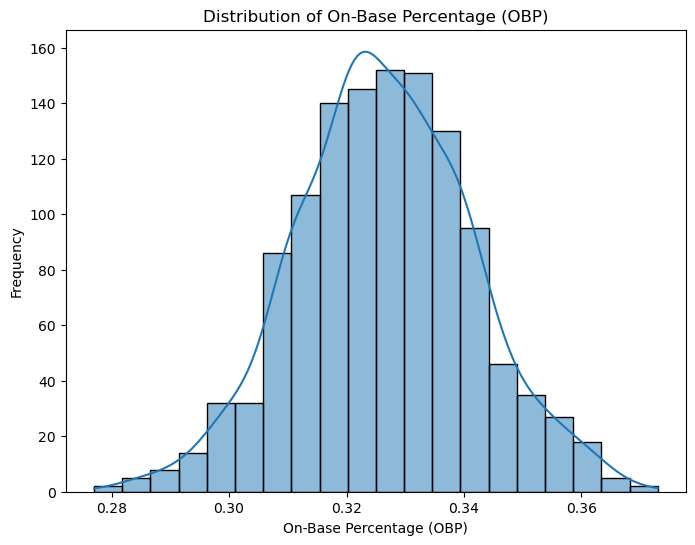

Mean OBP: 0.32633116883116886
Median OBP: 0.326
Standard Deviation OBP: 0.01501277233416599


In [101]:
# Univariate Analysis

# Create a plot that shows the distribution of OBP
plt.figure(figsize=(8,6))
sns.histplot(checkin_df['OBP'], kde=True, bins=20)
plt.title('Distribution of On-Base Percentage (OBP)')
plt.xlabel('On-Base Percentage (OBP)')
plt.ylabel('Frequency')
plt.show()

print('Mean OBP:', checkin_df['OBP'].mean())
print('Median OBP:', checkin_df['OBP'].median())
print('Standard Deviation OBP:', checkin_df['OBP'].std())

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


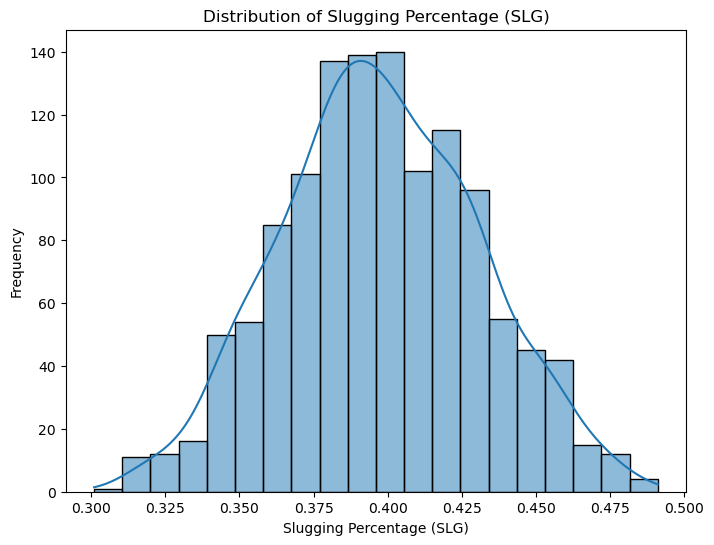

Mean SLG: 0.39734172077922075
Median SLG: 0.396
Standard Deviation SLG: 0.033266898621737706


In [105]:
# Create a plot that shows the distribution of SLG

plt.figure(figsize=(8,6))
sns.histplot(checkin_df['SLG'], kde=True, bins=20)
plt.title('Distribution of Slugging Percentage (SLG)')
plt.xlabel('Slugging Percentage (SLG)')
plt.ylabel('Frequency')
plt.show()

print('Mean SLG:', checkin_df['SLG'].mean())
print('Median SLG:', checkin_df['SLG'].median())
print('Standard Deviation SLG:', checkin_df['SLG'].std())


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


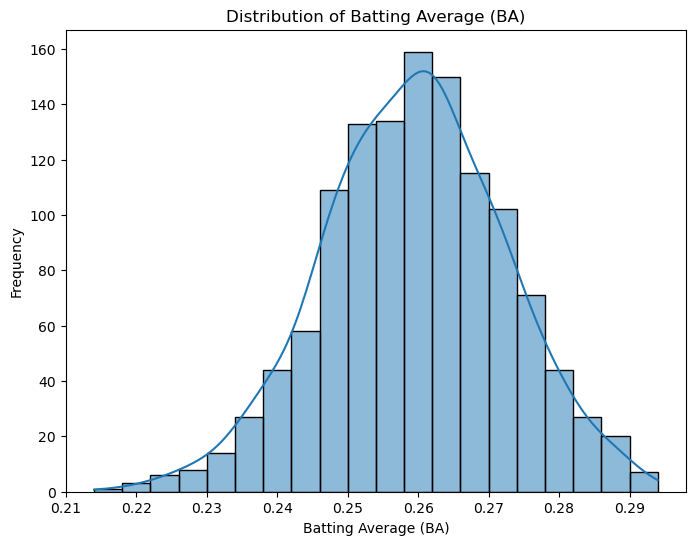

Mean BA: 0.25927272727272727
Median BA: 0.26
Standard Deviation BA: 0.012907228928000327


In [106]:
# Create a plot that shows the distribution of BA

plt.figure(figsize=(8,6))
sns.histplot(checkin_df['BA'], kde=True, bins=20)
plt.title('Distribution of Batting Average (BA)')
plt.xlabel('Batting Average (BA)')
plt.ylabel('Frequency')
plt.show()

print('Mean BA:', checkin_df['BA'].mean())
print('Median BA:', checkin_df['BA'].median())
print('Standard Deviation BA:', checkin_df['BA'].std())


In [102]:
# Hypothesis Test

# Change data type of column to numeric to perfrom tests
checkin_df['Home Runs'] = pd.to_numeric(checkin_df['Home Runs'], errors='coerce')

# The goal is to see if homeruns are significantly different for playoff vs non-playoff teams?

playoff_hr = checkin_df[checkin_df['Playoffs'] == 'Yes']['Home Runs'].dropna()
non_playoff_hr = checkin_df[checkin_df['Playoffs'] == 'No']['Home Runs'].dropna()

t_stat, p_value = stats.ttest_ind(playoff_hr, non_playoff_hr, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Result: Statistically significant difference in Home Runs between playoff and non-playoff teams.")
else:
    print("Result: No statistically significant difference in Home Runs between playoff and non-playoff teams.")

T-statistic: 9.823165656488838
P-value: 2.083950817803217e-20
Result: Statistically significant difference in Home Runs between playoff and non-playoff teams.


In [104]:
# Assign features and target variable

X = checkin_df[['OBP', 'BA', 'SLG', 'Total Home Attendance']]
y = checkin_df['Wins']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assign and fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Show the score and MSE of the model
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

# Display model coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

Mean Squared Error: 94.23057447906525
R-squared: 0.23759058560753865
                 Feature  Coefficient
0                    OBP   278.288398
1                     BA     7.822252
2                    SLG    -5.875437
3  Total Home Attendance     0.000004
